# How to use the Spectrum Class

SpecpolFlow provides a python class that holds a <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object. 

In this tutorial, we demonstrate the capabilities of this class. 

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object contains the following data arrays:

* wl - wavelengths
* specI - Stokes I spectrum
* specV - polarized spectrum, usually Stokes V
* specN1 - the first polarimetric null spectrum
* specN2 - the second polarimetric null spectrum
* specSig - the formal uncertainties, which apply to the all spectra.
* header - the text in the header of a .s file

You will need to load the following packages

In [1]:
import specpolFlow as pol
import matplotlib.pyplot as plt
import numpy as np

We will be using this .s file for our demonstrations: [1604052pu.s.norm](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/Tutorials/CalculateBisector_tutorialfiles/1604052pu.s.norm)

## How to load and save a Spectrum from a '.s' file

::::{margin}
:::{note}
The <a href='../API/Spectrum_API.html#specpolFlow.read_spectrum'>`read_spectrum`</a> has a few optional advanced keywords that can be used to automatically reject some types of bad data (e.g. negative flux values), and to order the datapoints in order of wavelengths -- see the API for details. 
:::
::::
To load in a spectrum in .s format, we can use the <a href='../API/Spectrum_API.html#specpolFlow.read_spectrum'>`read_spectrum`</a> function. 

Text(0, 0.5, 'Normalized Stokes I')

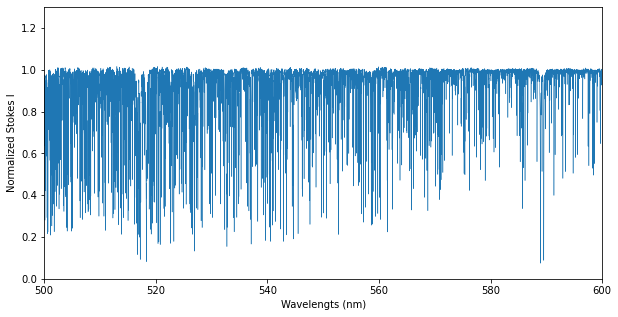

In [2]:
spec = pol.read_spectrum('CalculateBisector_tutorialfiles/1604052pu.s.norm')

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(spec.wl, spec.specI, lw = 0.5)
ax.set_ylim(0,1.3)
ax.set_xlim(500,600)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')

If the '.s' file had a text header, it will be available from the `header` property of the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object:

In [3]:
print(spec.header)

None


As you can see here, since the file did not have a header, the `spec.header` is set to `None`

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object can be saved in a '.s' format with the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.save'>`spectrum.save`</a> class function.

In the example below, we will add a header to the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object, and save. 

In [4]:
spec.header = 'Spectrum for star HS 123456'

spec.save('Output/Spectrum.s', saveHeader = True)
# saveHeader = True is the default. 
# If you would like to skip the '.s' 2-line header, set to False

:::{note}
The <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> class supports 3 types of '.s' file format
* Polarimetric spectrum with 6 columns
* Spectroscopic spectrum with 3 columns (Wavelength, Flux, uncertainty): in this case the spectrum.specV, spectrum.N1, spectrum.N2 will be set to zero
* Spectroscopic spectum with 2 columns (Wavelength, Flux): in this case spectrum.specSig, spectrum.specV, spectrum.N1, spectrum.N2 will be set to zero. 

The <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.save'>`spectrum.save`</a> function will save the spectrum in a 2, 3, or 5 columns format, if it detects columns that are strickly filled with zeros. 
:::

## How to use indexing and concatenation

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object can be sliced and indexed using python normal list indexation.

In [5]:
print('The spectrum has {} datapoints'.format(len(spec)))

print('The maximum wavelength is {} nm'.format(spec.wl[-1]))

cut_spectrum = spec[spec.wl>600]
print(cut_spectrum[0].wl)

The spectrum has 171360 datapoints
The maximum wavelength is 1048.0732 nm
600.003


Here's a slighly more advanced example that illustrates how one can assign a <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object to a slice of another <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object. Here, we replace a section of the spectrm with ones for the intensity and zeros for the polarization. Of course, it is also possible to assigned arrays of zeros and ones to each individual arrays of `spec`. 
````
spec.specI[0:1500] = 1.0
spec.specV[0:1500] = 0.0
...
````

Text(0, 0.5, 'Normalized Stokes I')

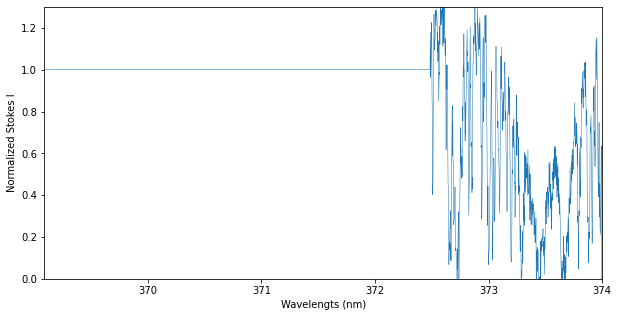

In [6]:
# Create a spectrum object with 1500 datapoints
n = 1500
replace = pol.Spectrum(spec.wl[0:n], np.ones(n), # wl and specI
                       np.zeros(n), np.zeros(n), np.zeros(n), # specV, specN1, and specN2
                       np.ones(n)) # specSig

spec[0:n] = replace

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(spec.wl, spec.specI, lw = 0.5)
ax.set_ylim(0,1.3)
ax.set_xlim(min(spec.wl),374)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')

We can also concatenate mutiple <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object using the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.contatenate'>`Spectrum.concatenate`</a> class function. 

In the example below, we create two new <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> objects by slicing `spec`, and we then concatenate them together

Text(0, 0.5, 'Normalized Stokes I')

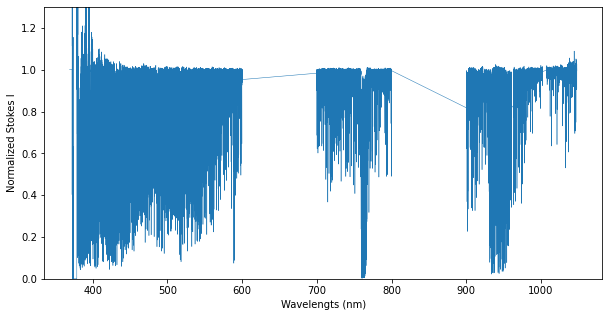

In [7]:
spec1 = spec[spec.wl<600]
spec2 = spec[np.logical_and(spec.wl>700,spec.wl<800)]
spec3 = spec[spec.wl>900]

spec_cat = spec1.concatenate([spec2,spec3])

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(spec_cat.wl, spec_cat.specI, lw = 0.5)
ax.set_ylim(0,1.3)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')

## How to coadd multiple spectra

## How to extract and merge spectral orders for echelle spectra